## CNN for classification

In [1]:
# Load the data
# our basic libraries
import torch
import torchvision

# data loading and transforming
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

from collections import OrderedDict

# The output of torchvision datasets are PILImage images of range [0, 1]. 
# We transform them to Tensors for input into a CNN

## Define a transform to read the data in as a tensor
data_transform = transforms.ToTensor()

# choose the training and test datasets
train_data = FashionMNIST(root='./data', train=True,
                                   download=True, transform=data_transform)

test_data = FashionMNIST(root='./data', train=False,
                                  download=True, transform=data_transform)

# Print out some stats about the training and test data
print('Train data, number of images: ', len(train_data))
print('Test data, number of images: ', len(test_data))

Train data, number of images:  60000
Test data, number of images:  10000


In [2]:
# prepare data loaders, set the batch_size
## you can try changing the batch_size to be larger or smaller
## when you get to training your network, see how batch_size affects the loss
batch_size = 20

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

# specify the image classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

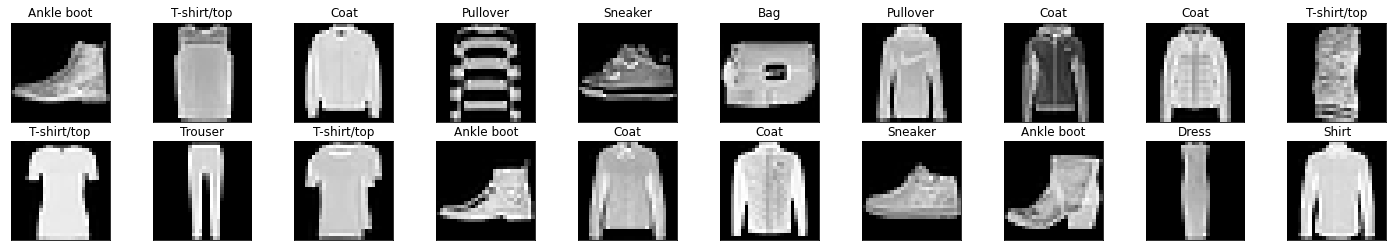

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(classes[labels[idx]])

In [5]:
import torch.nn as nn 
import torch.nn.functional as F 

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Sequential(
            OrderedDict([
                ('conv1',nn.Conv2d(1, 10, kernel_size = 3)),
                ('relu1',nn.ReLU()),
                ('bachnorm1', nn.BatchNorm2d(10))]))

        self.layer2 = nn.Sequential(
            OrderedDict([
                ('maxp1', nn.MaxPool2d(2,2))]))

        self.layer3 = nn.Sequential(
            OrderedDict([
                ('conv2',nn.Conv2d(10, 20, kernel_size = 3)),
                ('relu2', nn.ReLU())]))
        
        self.layer4 = nn.Sequential(
            OrderedDict([
                ('fc1', nn.Linear(11*11*20, 200)),
                ('relu3',nn.ReLU()),
                ('dropout4', nn.Dropout(0.4))]))
        
        self.layer5 = nn.Sequential(OrderedDict([
            ('fc2', nn.Linear(200, 100)),
            ('relu4', nn.ReLU()),
            ('dropout5',  nn.Dropout(0.4))]))
        
        self.layer6 = nn.Sequential(OrderedDict([
            ('fc3', nn.Linear(100, 10)),
            ('relu5', nn.ReLU())]))

    ## define the feedforward behavior
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        
        out = out.view(out.size(0), -1)
        
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        
        # final output
        return F.log_softmax(out, dim=1)

# instantiate and print your Net
net = Net()
print(net.layer1)

Sequential(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (bachnorm1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [6]:
# instantiate your Net
net = Net()

# load the net parameters by name, uncomment the line below to load your model
net.load_state_dict(torch.load('saved_models/model_91.pt'))

print(net)

Net(
  (layer1): Sequential(
    (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (relu1): ReLU()
    (bachnorm1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (maxp1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
    (relu2): ReLU()
  )
  (layer4): Sequential(
    (fc1): Linear(in_features=2420, out_features=200, bias=True)
    (relu3): ReLU()
    (dropout4): Dropout(p=0.4, inplace=False)
  )
  (layer5): Sequential(
    (fc2): Linear(in_features=200, out_features=100, bias=True)
    (relu4): ReLU()
    (dropout5): Dropout(p=0.4, inplace=False)
  )
  (layer6): Sequential(
    (fc3): Linear(in_features=100, out_features=10, bias=True)
    (relu5): ReLU()
  )
)


## Feature Visualization

To see what your network has learned, make a plot of the learned image filter weights and the activation maps (for a given image) at each convolutional layer.

### Visualize the learned filter weights and activation maps of the convolutional layers in your trained Net

Choose a sample input image and apply the filters in every convolutional layer to that image to see the activation map.

First convolutional layer


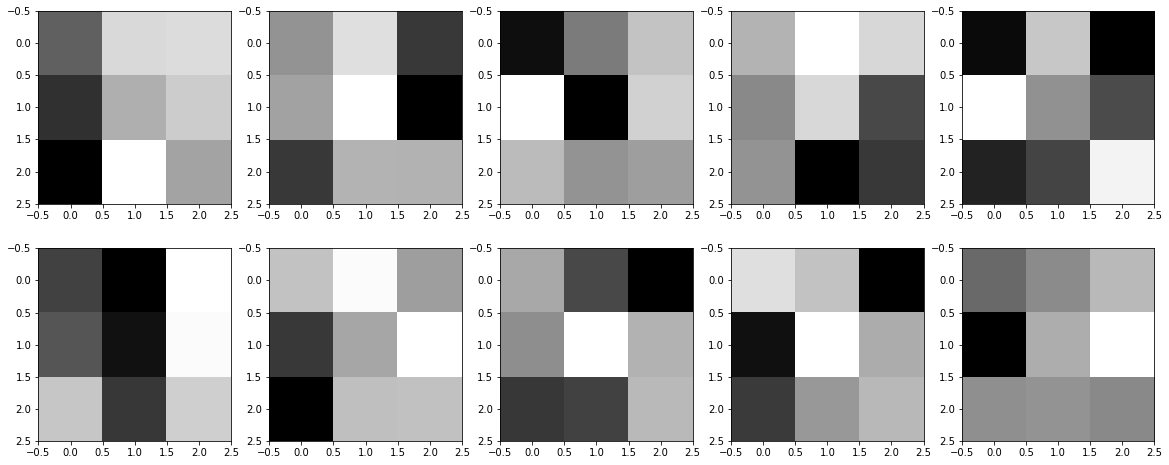

In [8]:
# As a reminder, here is how we got the weights in the first conv layer (conv1), before
weights = net.layer1.conv1.weight.data
w = weights.numpy()

# for 10 filters
fig=plt.figure(figsize=(20, 8))
columns = 5
rows = 2
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(w[i][0], cmap='gray')
    
print('First convolutional layer')
plt.show()

Second convolutional layer


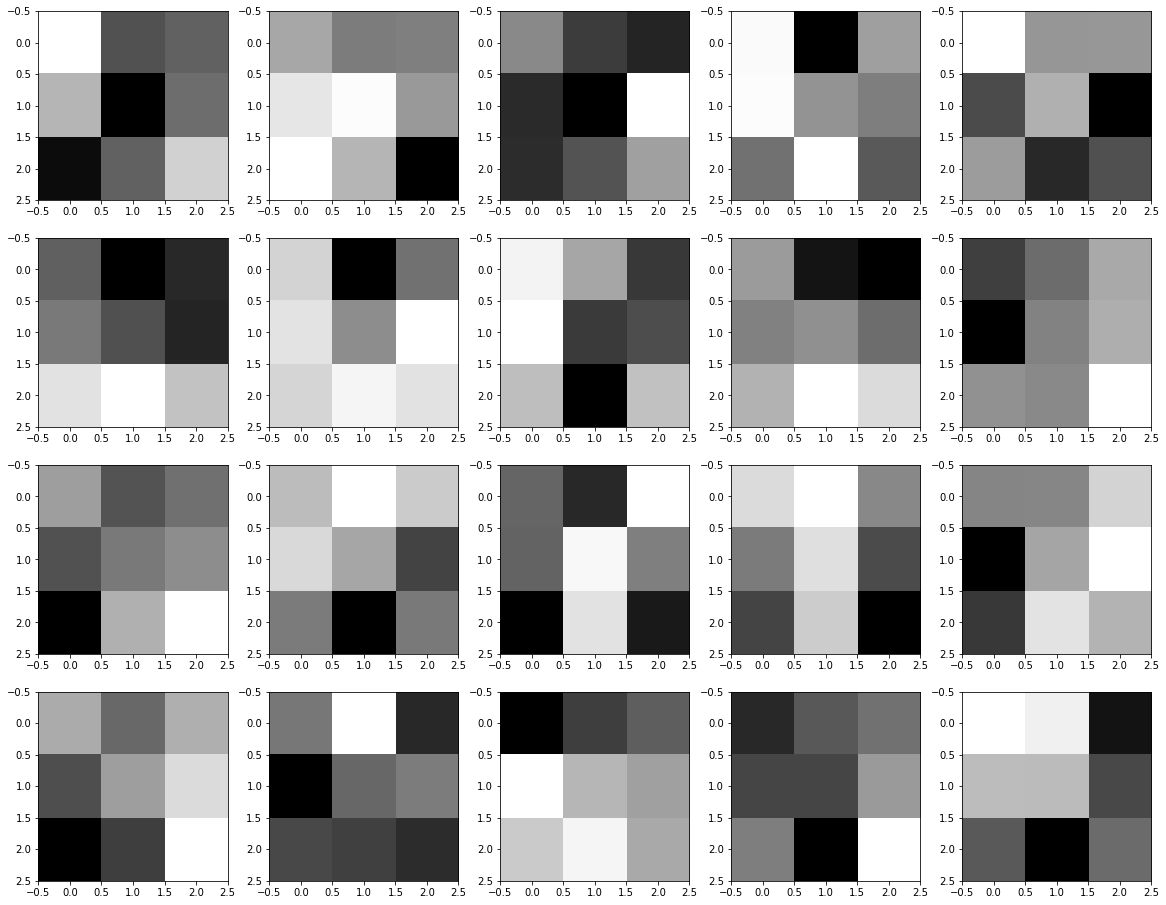

In [9]:
weights = net.layer3.conv2.weight.data
w = weights.numpy()

# for 20 filters
fig=plt.figure(figsize=(20, 16))
columns = 5
rows = 4
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(w[i][0], cmap='gray')
    
print('Second convolutional layer')
plt.show()

### Activation Maps

Next, you'll see how to use OpenCV's `filter2D` function to apply these filters to a sample test image and produce a series of **activation maps** as a result. We'll do this for the first and second convolutional layers and these activation maps whould really give you a sense for what features each filter learns to extract.

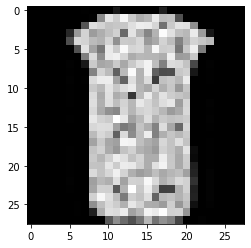

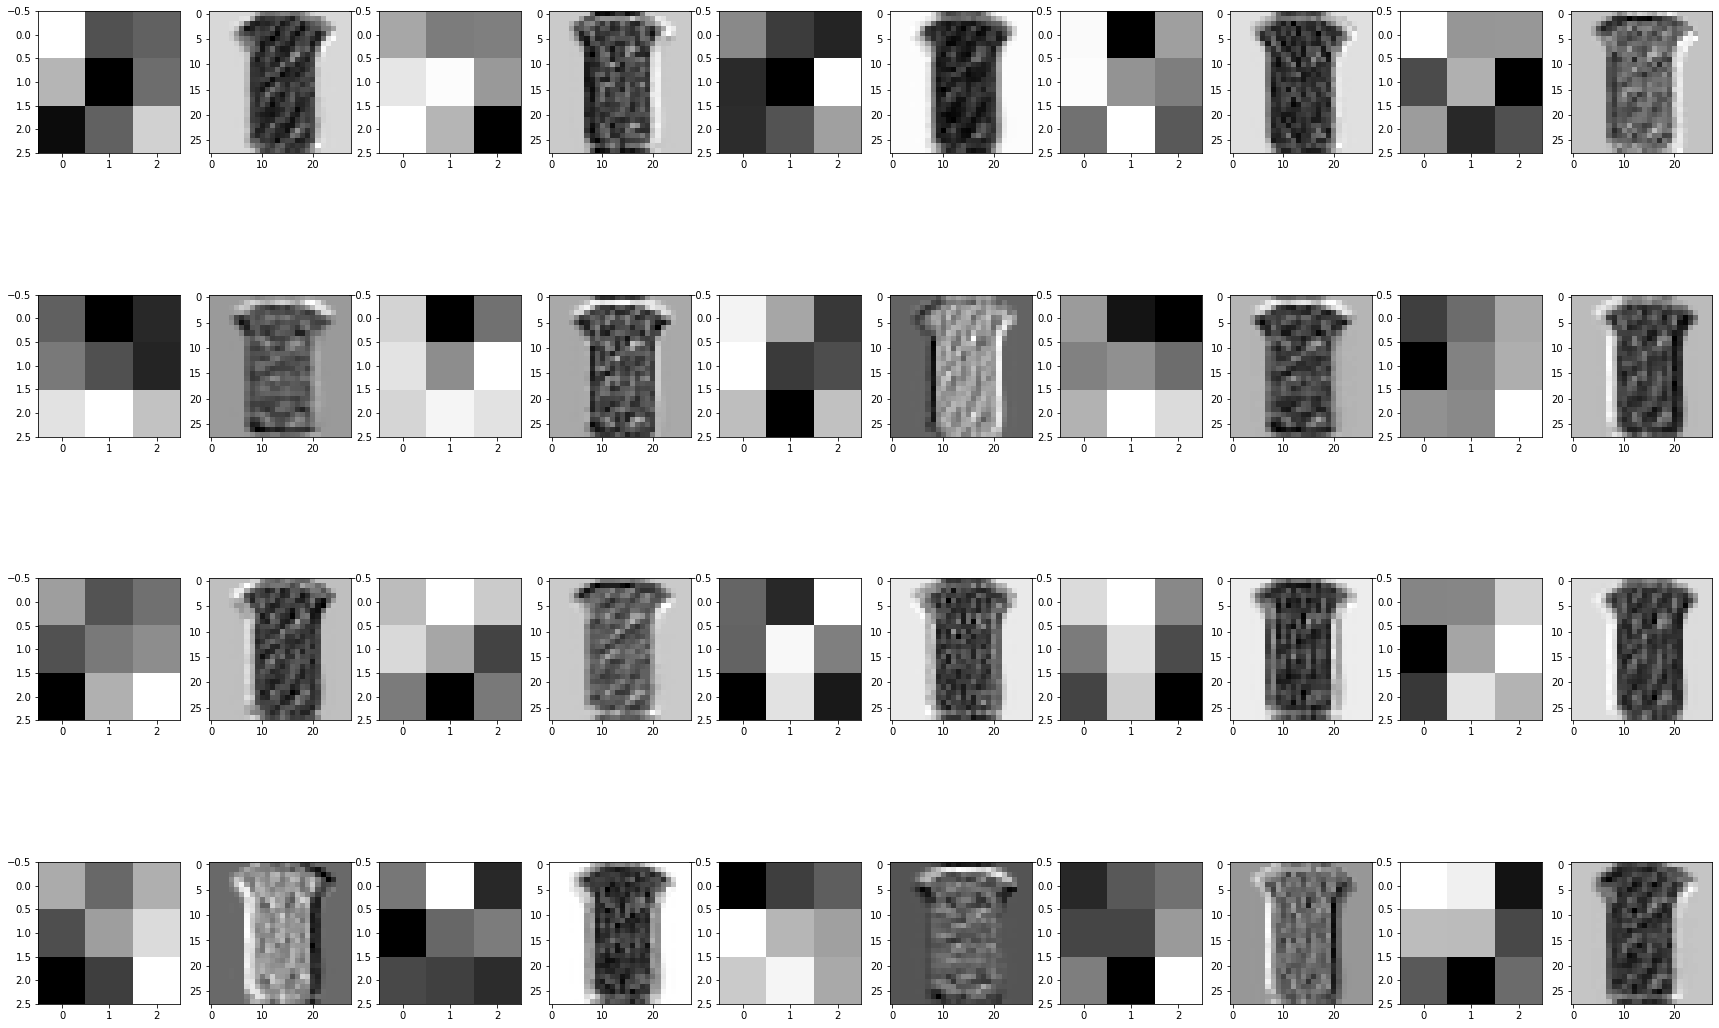

In [10]:
# obtain one batch of testing images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images = images.numpy()

# select an image by index
idx = 7
img = np.squeeze(images[idx])

# Use OpenCV's filter2D function 
# apply a specific set of filter weights (like the one's displayed above) to the test image

import cv2
plt.imshow(img, cmap='gray')

weights = net.layer3.conv2.weight.data
w = weights.numpy()

# second conv layer
# for 20 filters
fig=plt.figure(figsize=(30, 20))
columns = 5*2
rows = 4
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    if ((i%2)==0):
        plt.imshow(w[int(i/2)][0], cmap='gray')
    else:
        c = cv2.filter2D(img, -1, w[int((i-1)/2)][0])
        plt.imshow(c, cmap='gray')
plt.show()